#### **``IRIS DATASET``**

In [1]:
import os
import sys
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
iris_df = sns.load_dataset('iris')

In [3]:
type(iris_df)

pandas.core.frame.DataFrame

In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

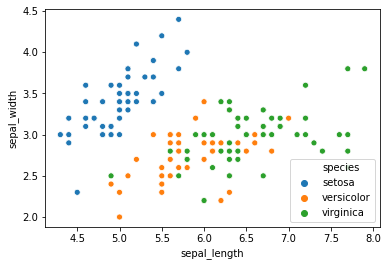

In [6]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=iris_df)

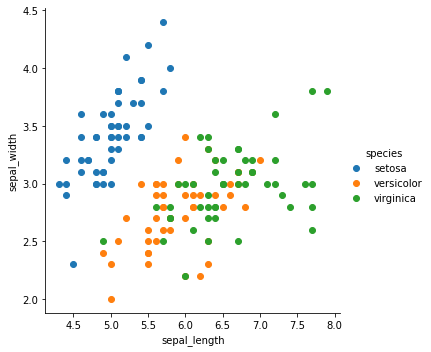

In [7]:
sns.FacetGrid(data=iris_df,hue='species',height=5)\
.map(plt.scatter, 'sepal_length', 'sepal_width')\
.add_legend();
plt.show()

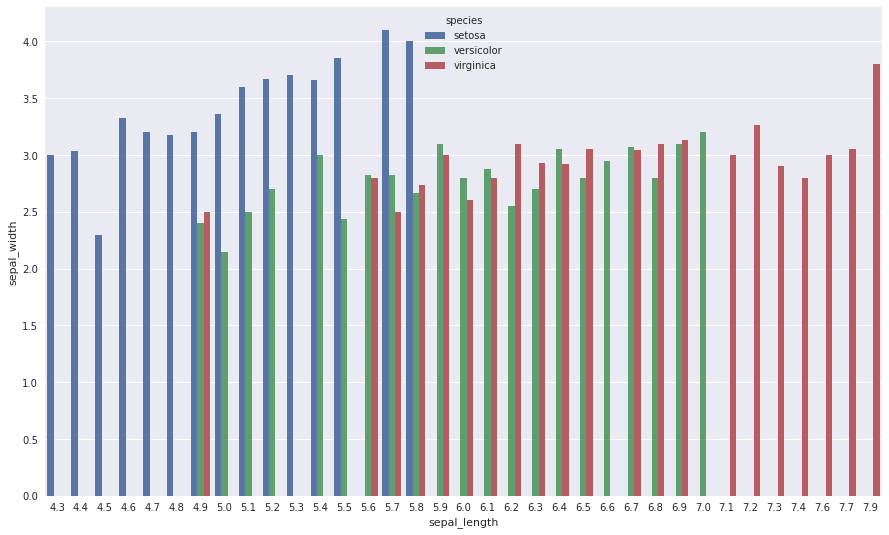

In [8]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,9))
    sns.barplot(x='sepal_length',y='sepal_width',hue='species',data=iris_df,ci=False)
plt.show();

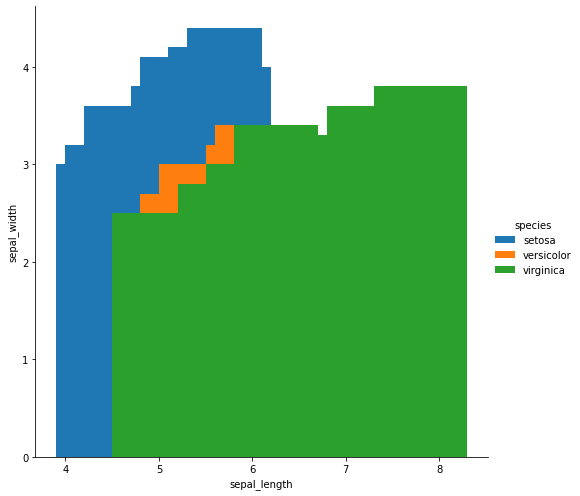

In [10]:
sns.FacetGrid(data=iris_df,hue='species',height=7)\
.map(plt.bar,'sepal_length','sepal_width')\
.add_legend();
plt.show();

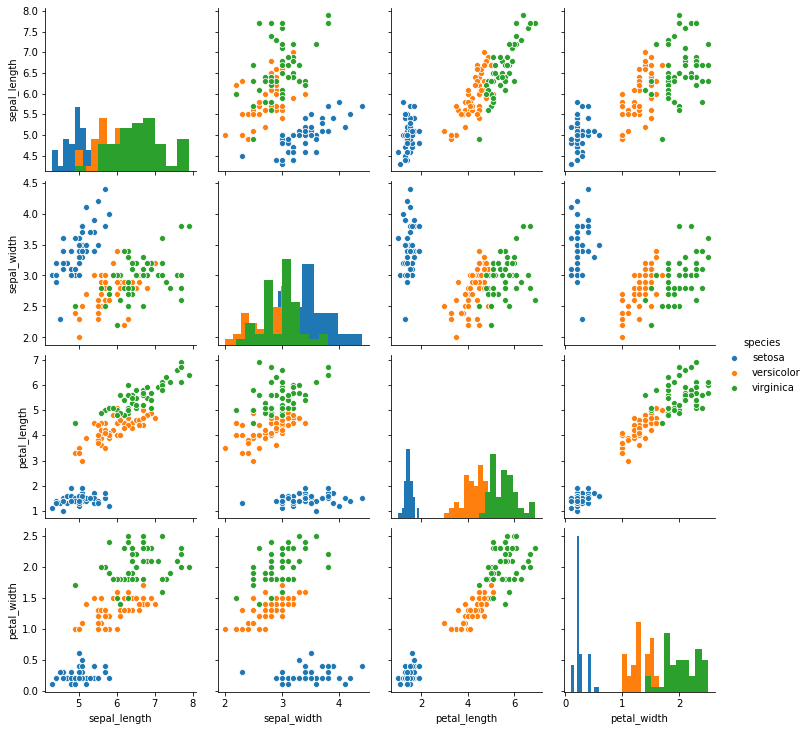

In [16]:
sns.pairplot(data=iris_df,hue='species',diag_kind='hist');
plt.show();

In [20]:
iris_df.loc[iris_df['species'] == 'setosa'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
import scipy
from scipy.stats import norm as nm

In [53]:
petal_length_cdf = nm.cdf(scipy.stats.zscore(iris_df['petal_length']))

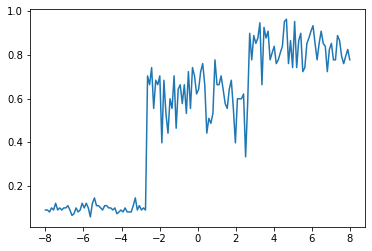

In [54]:
plt.plot(np.linspace(-8,8,num=len(iris_df['petal_length'])),petal_length_cdf);

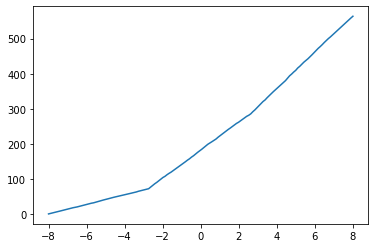

In [47]:
plt.plot(np.linspace(-8,8,num=len(iris_df['petal_length'])),np.cumsum(iris_df['petal_length']));

In [55]:
pd.DataFrame(petal_length_cdf,np.cumsum(iris_df['petal_length']))

,0
petal_length,
1.4,0.090086
2.8,0.090086
4.1,0.081197
5.6,0.099678
7.0,0.090086
...,...
543.0,0.793777
548.0,0.759881
553.2,0.793777


In [73]:
data = pd.concat([pd.DataFrame(nm.cdf(nm.pdf(scipy.stats.zscore(iris_df['petal_length']))))\
          ,pd.DataFrame(np.cumsum(iris_df['petal_length']))],axis=1).reset_index(drop=True)

data.columns = ['col1_zscore','col2']

In [74]:
data.head()

,col1_zscore,col2
0,0.564546,1.4
1,0.564546,2.8
2,0.559753,4.1
3,0.569494,5.6
4,0.564546,7.0


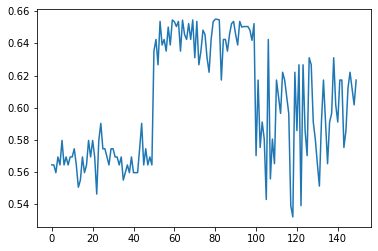

In [76]:
plt.plot(np.linspace(-8,8,num=len(iris_df['petal_length'])),data['col1_zscore']);

In [152]:
dummy_data = np.array([10,10,20,20,20,35,35,35,35,35,50,50,40,55,55,55,60,60,60,60,60,60,60,60,62,62,70,70,70])

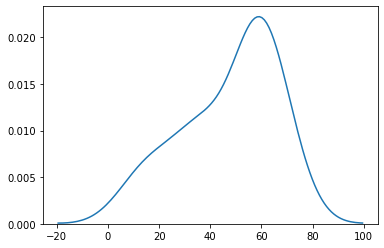

In [153]:
sns.kdeplot(dummy_data);

In [154]:
print('Mean ',np.mean(dummy_data))
print('Median ',np.median(dummy_data))
print('Mean ',scipy.stats.mode(dummy_data))

Mean  47.37931034482759
Median  55.0
Mean  ModeResult(mode=array([60]), count=array([8]))


In [155]:
np.var(dummy_data), np.std(dummy_data)

(320.3043995243758, 17.89705002296121)

In [156]:
55+17, 60+17

(72, 77)

In [145]:
np.histogram(dummy_data,density=True)

(array([0.01149425, 0.01724138, 0.        , 0.        , 0.02873563,
        0.00574713, 0.01724138, 0.01149425, 0.05747126, 0.01724138]),
 array([10., 16., 22., 28., 34., 40., 46., 52., 58., 64., 70.]))

In [146]:
cnt , edge = np.histogram(dummy_data,density=True)

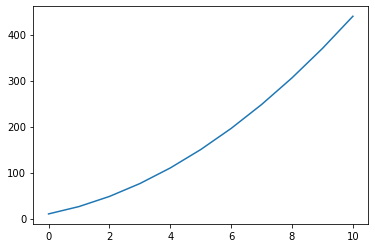

In [147]:
plt.plot(np.cumsum(edge))